# Reaizado por:

**Cesar Augusto Saenz Jimenez**

**Ricardo Alejadro Giraldo**

**Laura Manuela Caro**

<h1 style="color: Pink">Random Forest Classifier</h1>

In [1]:
# Cargue las bibliotecas 
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn import tree
import pydotplus
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel("BD_TRABAJO_GRADO.xlsx",engine='openpyxl',index_col=0)
df.reset_index(drop=True, inplace=True)
df.head()

,Genero,Estado_Civil,Tpo_Contrato,Estado_Empleado,Fecha_Ingreso,Fecha_Retiro,Dias_Permanencia,Motivo_Retiro,Tipo_Cargo,Responsabilidad,Servicio_Cliente,Madurez_Emocional,Productividad,Honestidad,Compromiso,Desempeño_Seguro,ERI
0,M,NaN,Fijo,Retirado,2018-02-03,2018-02-19,16,Renuncia,Operativos y Auxiliares,42,25,20,10,23,21,37,PS
1,M,NaN,Fijo,Retirado,2018-08-02,2020-11-06,827,Renuncia,Operativos y Auxiliares,16,11,31,14,8,3,15,PS
2,M,NaN,Fijo,Retirado,2018-08-13,2019-02-07,178,Renuncia,Operativos y Auxiliares,33,22,21,13,22,20,42,PS
3,M,NaN,Fijo,Retirado,2019-02-23,2019-09-20,209,Renuncia,Operativos y Auxiliares,24,21,25,17,21,7,17,PS
4,F,NaN,Fijo,Retirado,2018-02-17,2019-07-22,520,Renuncia,Operativos y Auxiliares,40,23,31,48,25,40,23,PS


### Limpieza de datos (Data Cleaning) y preparación

In [3]:
#filtramos solo aquellos empleados que su Tipo_Cargo sean Operativos y Auxiliares que son los que representan el 90% de la data y son los que mas rotacion tienen y Elimino la variable que no aportan al modelo 
df = df.loc[df['Tipo_Cargo'] == 'Operativos y Auxiliares']
df = df.drop(["Fecha_Ingreso", "Fecha_Retiro","Tipo_Cargo","Motivo_Retiro","Estado_Civil","Dias_Permanencia"], axis=1)
df["Estado_Empleado"].replace({"Activo": 1, "Retirado": 0}, inplace=True) #reemplace los valores de estado del empleado asi Activos por 1 y Retirados por 0
df.sample(8)

,Genero,Tpo_Contrato,Estado_Empleado,Responsabilidad,Servicio_Cliente,Madurez_Emocional,Productividad,Honestidad,Compromiso,Desempeño_Seguro,ERI
8949,M,Fijo,1,19,18,28,17,17,11,23,DP
10448,M,Fijo,1,20,19,19,8,4,8,20,DP
412,M,Fijo,0,17,19,24,14,18,13,20,DP
10698,M,Fijo,1,16,37,22,36,7,19,39,PS
2774,F,Fijo,0,34,16,16,8,22,23,43,DP
10317,M,Fijo,1,13,13,21,10,2,48,22,PS
8767,M,Fijo,1,33,32,15,15,8,2,17,DP
9082,M,Fijo,1,37,17,27,17,19,1,7,PS


In [4]:
df =pd.get_dummies(data =df)
df.head()

,Estado_Empleado,Responsabilidad,Servicio_Cliente,Madurez_Emocional,Productividad,Honestidad,Compromiso,Desempeño_Seguro,Genero_F,Genero_M,Tpo_Contrato_Fijo,Tpo_Contrato_Indefinido,ERI_DP,ERI_FP,ERI_NV,ERI_PS
0,0,42,25,20,10,23,21,37,0,1,1,0,0,0,0,1
1,0,16,11,31,14,8,3,15,0,1,1,0,0,0,0,1
2,0,33,22,21,13,22,20,42,0,1,1,0,0,0,0,1
3,0,24,21,25,17,21,7,17,0,1,1,0,0,0,0,1
4,0,40,23,31,48,25,40,23,1,0,1,0,0,0,0,1


### Normalizacion de los datos

In [5]:
# Normalización de los datos para el Df Activos y aplicamos el Reset al index ya que me puso valores diferentes sin la variable objetivo
df = (df-df.min())/(df.max()-df.min())
df.describe()

,Estado_Empleado,Responsabilidad,Servicio_Cliente,Madurez_Emocional,Productividad,Honestidad,Compromiso,Desempeño_Seguro,Genero_F,Genero_M,Tpo_Contrato_Fijo,Tpo_Contrato_Indefinido,ERI_DP,ERI_FP,ERI_NV,ERI_PS
count,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000
mean,0.520078,0.522057,0.448134,0.396621,0.247226,0.303929,0.314374,0.419260,0.278929,0.721071,0.743092,0.256908,0.486831,0.063795,0.002051,0.447323
std,0.499624,0.194718,0.196649,0.149686,0.138223,0.121801,0.309955,0.231203,0.448497,0.448497,0.436952,0.436952,0.499854,0.244401,0.045243,0.497244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.382979,0.297872,0.297872,0.170213,0.234043,0.085106,0.255319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.531915,0.404255,0.404255,0.234043,0.319149,0.212766,0.404255,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.659574,0.574468,0.489362,0.319149,0.382979,0.404255,0.574468,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Seleccion de las Metricas para Divisiones

In [6]:
#seleccionamos las varibles
#x=df.drop(columns="Estado_Empleado")#Explicativas
#y= df.Estado_Empleado #objetivo

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns="Estado_Empleado"), #x
                                                    df.Estado_Empleado, #y
                                                    test_size=0.5, 
                                                    random_state=0
                                                    )
#print("Numero de Muestras en y:",np.bincount(y))
print("Numero de Muestras en y_train:",np.bincount(y_train))
print("Numero de Muestras en y_test:",np.bincount(y_test))

Numero de Muestras en y_train: [2229 2403]
Numero de Muestras en y_test: [2217 2415]


In [8]:
#Estandarizacion de los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

## Entrenar Modelo Random forest()

In [9]:
#Conjunto de datos en 70% (entrenamiento) y 30% (test) Utilizando la funcion train_test_split
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=150,
                                criterion='gini', # Caracteristicas que toma cada vez normalmente sqrt pero tambn esatn entropy, log_loss
                                max_features='sqrt', #“sqrt”, “log2”, None, default=”sqrt”
                                bootstrap=True,  #Si es False, se utiliza todo el conjunto de datos para construir cada árbol.
                                max_samples= 0.8, #en el ejemplo usaron 2/3
                                oob_score=True, #Metrica especial para bosques aleatorios muy importante
                                max_depth=15) #Profundidad 
forest.fit(x_train_std, y_train)                             

RandomForestClassifier(max_depth=15, max_samples=0.8, n_estimators=150,
                       oob_score=True)

In [10]:
print("Train Accuracy : %.5f" %forest.score(x_train_std, y_train))
print("Test Accuracy : %.5f" %forest.score(x_test_std, y_test))

Train Accuracy : 0.96136
Test Accuracy : 0.56801


[Text(0.5, 1.0, 'Estado_Empleado'),
 Text(0.5, 0, 'Clases predichas'),
 Text(0, 0.5, 'Clases verdaderas')]

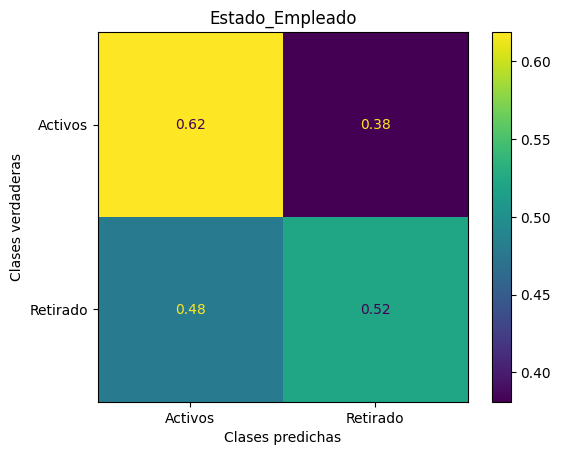

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = forest.predict(x_test_std)
cm = confusion_matrix(y_test, y_pred, normalize='true')

cm_display = ConfusionMatrixDisplay(cm, display_labels=['Activos','Retirado'])#Confirmar si estan en ese orden
cm_display.plot()
cm_display.ax_.set(title='Estado_Empleado', xlabel='Clases predichas', ylabel='Clases verdaderas')

In [12]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)

print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1score: {}'.format(fscore))
print('Support: {}'.format(support))

Precision: [0.54272152 0.59838403]
Recall: [0.61885431 0.52132505]
F1score: [0.57829294 0.55720292]
Support: [2217 2415]
